In [ ]:
# Import libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# --- DATASET DOWNLOAD AND LOADING ---
# Let's download the MAGIC dataset from Kaggle using kagglehub
# Mount Google Drive to access and store files and copy the dataset in it

import kagglehub

path = kagglehub.dataset_download("abhinand05/magic-gamma-telescope-dataset")

print("Path to dataset files:", path)

100%|██████████| 706k/706k [00:00<00:00, 60.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/abhinand05/magic-gamma-telescope-dataset/versions/1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil

destination = '/content/drive/MyDrive/MAGIC ML/data'

shutil.copytree(path, destination)

print("Dataset copiato su Google Drive in:", destination)

In [ ]:
# Load of the data and convertion of class labels: 'g' → 1 (gamma), 'h' → 0 (hadron)
destination = '/content/drive/MyDrive/MAGIC ML/data'
data = pd.read_csv(destination + '/telescope_data.csv')
data['class'] = data['class'].map({'g': 1, 'h': 0})

# Drop of all the unnecessary columns
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

# EXPLORATORY DATA ANALYSIS (EDA)

In [ ]:
# Dataset exploration
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 1.6 MB


In [ ]:
data.describe()

fLength        fWidth         fSize         fConc        fConc1  \
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000   
mean      53.250154     22.180966      2.825017      0.380327      0.214657   
std       42.364855     18.346056      0.472599      0.182813      0.110511   
min        4.283500      0.000000      1.941300      0.013100      0.000300   
25%       24.336000     11.863800      2.477100      0.235800      0.128475   
50%       37.147700     17.139900      2.739600      0.354150      0.196500   
75%       70.122175     24.739475      3.101600      0.503700      0.285225   
max      334.177000    256.382000      5.323300      0.893000      0.675200   

              fAsym       fM3Long      fM3Trans        fAlpha         fDist  \
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000   
mean      -4.331745     10.545545      0.249726     27.645707    193.818026   
std       59.206062     51.000118     20.827439     26.103621     74.731787   
min     -457.916100   -331.780000   -205.894700      0.000000      1.282600   
25%      -20.586550    -12.842775    -10.849375      5.547925    142.492250   
50%        4.013050     15.314100      0.666200     17.679500    191.851450   
75%       24.063700     35.837800     10.946425     45.883550    240.563825   
max      575.240700    238.321000    179.851000     90.000000    495.561000   

              class  
count  19020.000000  
mean       0.648370  
std        0.477492  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000

In [ ]:
# Check for missing values
data.isna().sum()

fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64

In [ ]:
data.loc[data.duplicated()]

fLength   fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
12827  202.8290  73.9967  4.3622  0.0678  0.0364  -66.4079 -159.3540   
13332   30.1721  16.8838  2.6902  0.4673  0.2704    8.8759   25.3694   
13486   69.7676  18.9821  2.7478  0.5255  0.2654  -44.5832  -30.7591   
14150  130.3080  13.3030  2.6021  0.3250  0.1812 -204.5730  116.0500   
14160   16.9894  11.0002  2.4564  0.6294  0.3514   -3.4902    8.0823   
...         ...      ...     ...     ...     ...       ...       ...   
18809   60.5328  34.9208  3.0436  0.2732  0.1750  -39.5703   45.4899   
18826   38.7641  20.0218  2.6279  0.2921  0.1543  -49.9354  -21.7010   
18831   22.2134  18.3853  2.5653  0.4354  0.2599  -16.5600   16.1254   
18929   19.8489  12.8985  2.3847  0.5567  0.3155  -12.1732  -10.7301   
19001   57.1905  35.5095  2.7177  0.2337  0.1197  -48.5112  -54.2835   

       fM3Trans   fAlpha     fDist  class  
12827  -21.2584  76.1130  348.9780      0  
13332   14.0300  74.7090  229.2960      0  
13486  -12.9547  33.0052  303.9140      0  
14150    4.7837  49.7590  173.5520      0  
14160   -7.0516  55.3930   91.3761      0  
...         ...      ...       ...    ...  
18809  -28.7449   0.8124  290.6000      0  
18826  -13.0915  19.7802  136.9650      0  
18831   13.1403  23.6480   93.1750      0  
18929    7.9112  55.0925  168.9720      0  
19001   32.3612  44.7320  102.9950      0  

[115 rows x 11 columns]

In [ ]:
# Removing of duplicate colums
data = data.drop_duplicates().reset_index(drop=True)
data

fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
18900   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
18901   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
18902   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
18903  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
18904  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist  class  
0       -8.2027  40.0920   81.8828      1  
1       -9.9574   6.3609  205.2610      1  
2      -45.2160  76.9600  256.7880      1  
3       -7.1513  10.4490  116.7370      1  
4       21.8393   4.6480  356.4620      1  
...         ...      ...       ...    ...  
18900    2.8766   2.4229  106.8258      0  
18901   -2.9632  86.7975  247.4560      0  
18902   -9.4662  30.2987  256.5166      0  
18903  -63.8389  84.6874  408.3166      0  
18904   31.4755  52.7310  272.3174      0  

[18905 rows x 11 columns]

In [ ]:
# Looking at the data descriptions it seams peculiar for some data to be characterizeby a zero Width,
# due to the fact that the same dataset will be used to create image for the CNN analysis we decide to remove such rows
data.loc[data["fWidth"]== 0]

fLength  fWidth   fSize   fConc  fConc1    fAsym  fM3Long  fM3Trans  \
114    19.6419     0.0  2.2000  0.7950  0.5710  -0.5678   5.2697    0.0000   
146    22.5702     0.0  2.1629  0.7904  0.4021   5.3609 -15.2145    0.0000   
285    23.6426     0.0  2.3149  0.7312  0.3705   2.7603 -12.9376    0.0000   
510    21.5732     0.0  2.1222  0.7698  0.4792  -1.8113   9.6718    0.0000   
566    23.6829     0.0  2.0512  0.7289  0.3689   2.6669 -12.8175    0.0001   
...        ...     ...     ...     ...     ...      ...      ...       ...   
17910  24.4544     0.0  2.1861  0.6710  0.3355   0.1954  -5.5906    0.0000   
17984  25.1217     0.0  2.2799  0.7244  0.4383  25.4328  16.6693   -0.0001   
18041  24.0693     0.0  2.5321  0.7195  0.3715  27.2689  13.2176    0.0000   
18213  28.3794     0.0  2.5132  0.6564  0.4371   8.8343  20.4291   -0.0001   
18375  25.3582     0.0  2.4771  0.7667  0.4150   0.0000   0.0000  -11.6435   

        fAlpha     fDist  class  
114    34.8170  182.0160      1  
146    80.3449  210.8330      1  
285     0.0000  122.7600      1  
510     0.0002  118.1890      1  
566    77.2290   79.9193      1  
...        ...       ...    ...  
17910  59.9195  120.0980      0  
17984  48.5825  242.5150      0  
18041  26.6290  231.8630      0  
18213  56.4812  124.6520      0  
18375   4.9861  156.4770      0  

[98 rows x 11 columns]

In [ ]:
data = data[data["fWidth"] != 0].reset_index(drop=True)
data

fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
18802   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
18803   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
18804   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
18805  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
18806  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist  class  
0       -8.2027  40.0920   81.8828      1  
1       -9.9574   6.3609  205.2610      1  
2      -45.2160  76.9600  256.7880      1  
3       -7.1513  10.4490  116.7370      1  
4       21.8393   4.6480  356.4620      1  
...         ...      ...       ...    ...  
18802    2.8766   2.4229  106.8258      0  
18803   -2.9632  86.7975  247.4560      0  
18804   -9.4662  30.2987  256.5166      0  
18805  -63.8389  84.6874  408.3166      0  
18806   31.4755  52.7310  272.3174      0  

[18807 rows x 11 columns]

In [ ]:
# Target distribution
data['class'].value_counts()

class
1    12254
0     6553
Name: count, dtype: int64

##TARGET DISTRIBUTION PLOT

In [ ]:
data_plot = data.copy()
data_plot

fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
18802   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
18803   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
18804   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
18805  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
18806  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist  class  
0       -8.2027  40.0920   81.8828      1  
1       -9.9574   6.3609  205.2610      1  
2      -45.2160  76.9600  256.7880      1  
3       -7.1513  10.4490  116.7370      1  
4       21.8393   4.6480  356.4620      1  
...         ...      ...       ...    ...  
18802    2.8766   2.4229  106.8258      0  
18803   -2.9632  86.7975  247.4560      0  
18804   -9.4662  30.2987  256.5166      0  
18805  -63.8389  84.6874  408.3166      0  
18806   31.4755  52.7310  272.3174      0  

[18807 rows x 11 columns]

In [ ]:
data_plot['class label'] = data_plot['class'].map({1: 'g', 0: 'h'})
data_plot

fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
18802   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
18803   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
18804   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
18805  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
18806  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist  class class label  
0       -8.2027  40.0920   81.8828      1           g  
1       -9.9574   6.3609  205.2610      1           g  
2      -45.2160  76.9600  256.7880      1           g  
3       -7.1513  10.4490  116.7370      1           g  
4       21.8393   4.6480  356.4620      1           g  
...         ...      ...       ...    ...         ...  
18802    2.8766   2.4229  106.8258      0           h  
18803   -2.9632  86.7975  247.4560      0           h  
18804   -9.4662  30.2987  256.5166      0           h  
18805  -63.8389  84.6874  408.3166      0           h  
18806   31.4755  52.7310  272.3174      0           h  

[18807 rows x 12 columns]

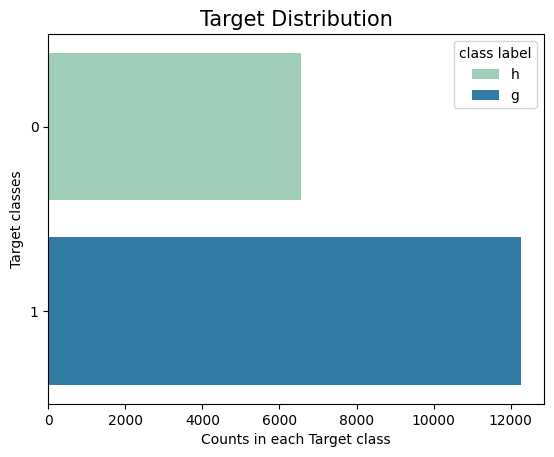

In [ ]:
ax = sns.countplot(y='class', data=data_plot, hue='class label', palette='YlGnBu')
plt.xlabel("Counts in each Target class")
plt.ylabel("Target classes")

plt.title('Target Distribution', fontsize=15)
plt.show()

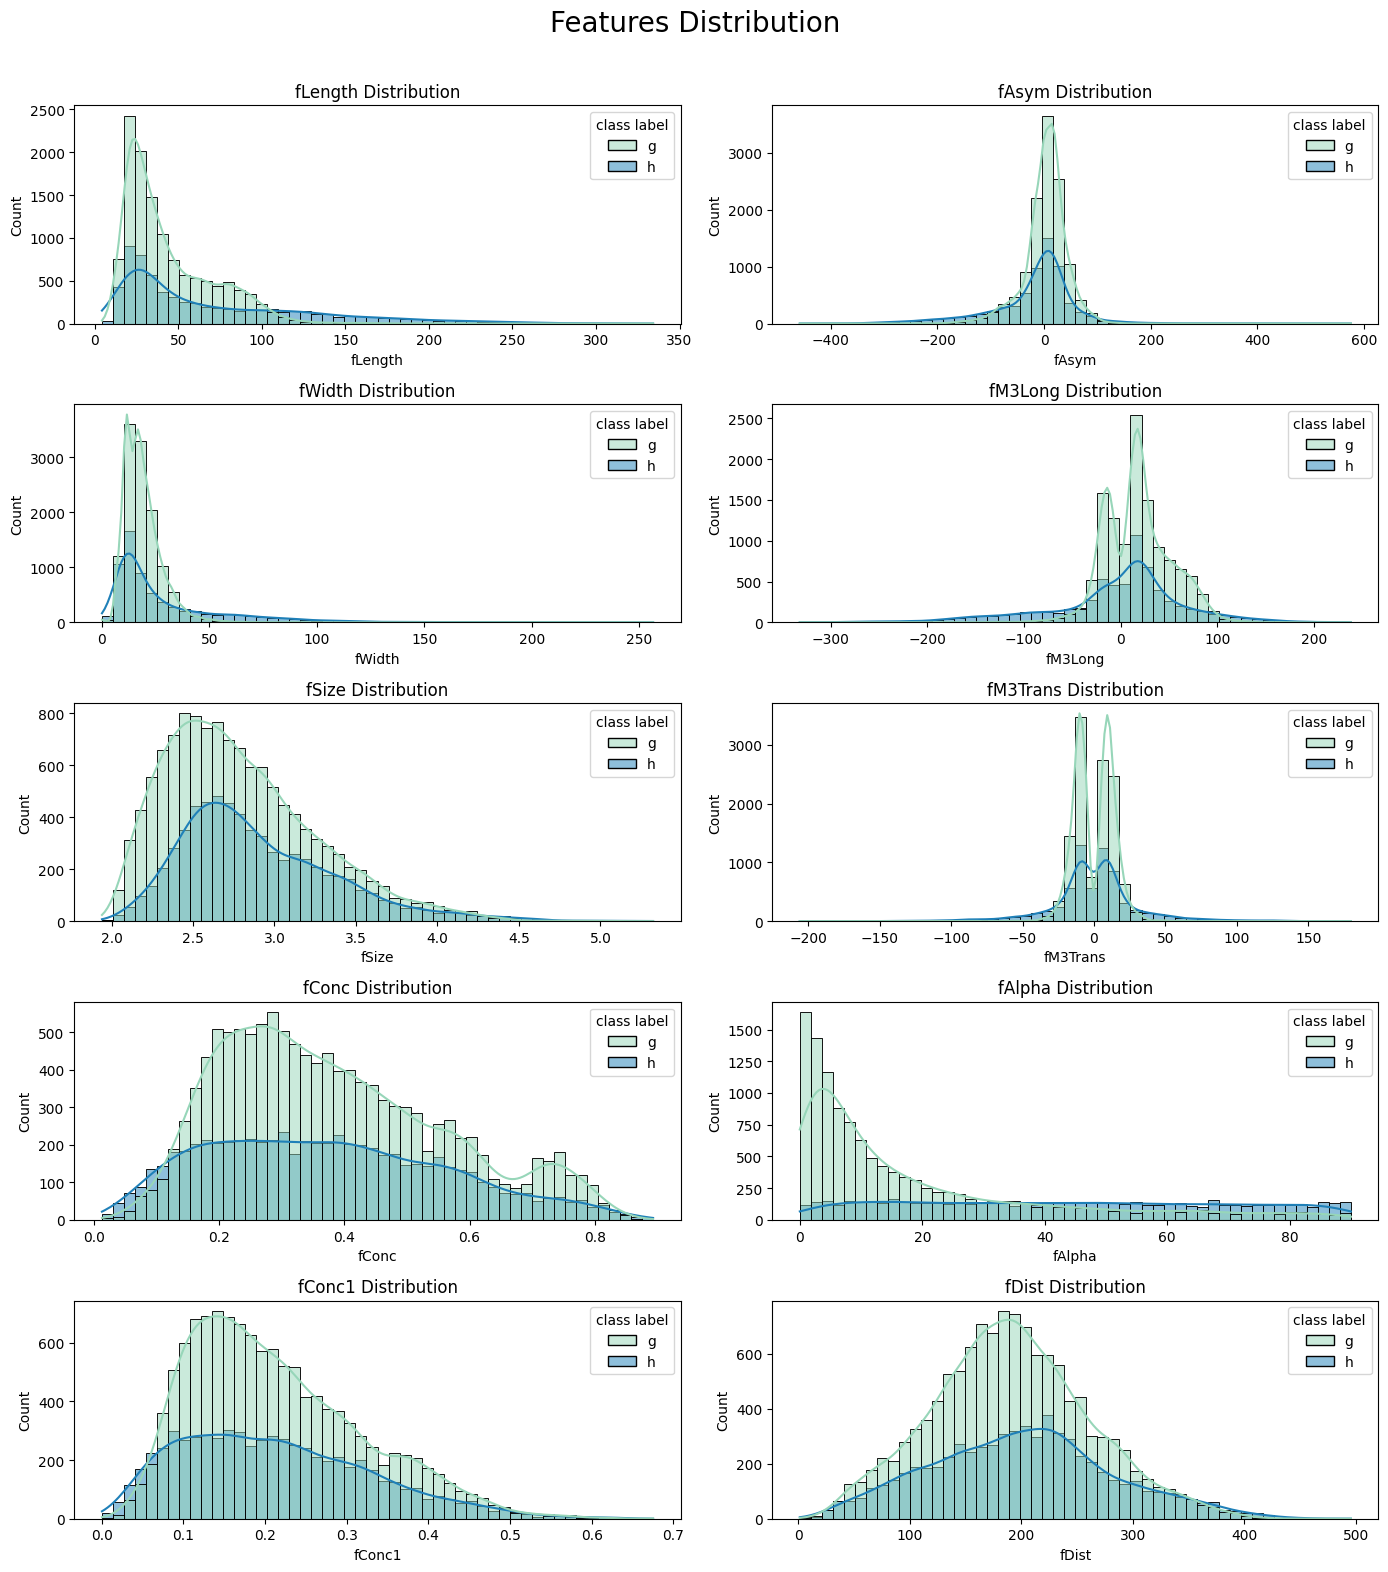

In [ ]:
# Feature distribution plots
features_1 = ['fLength','fWidth','fSize','fConc','fConc1']
features_2 = ['fAsym','fM3Long','fM3Trans','fAlpha','fDist']

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 16))
fig.suptitle('Features Distribution', fontsize=20)

for i, (f1, f2) in enumerate(zip(features_1, features_2)):

    sns.histplot(data=data_plot, x=f1, hue='class label', kde=True, bins=50, palette='YlGnBu', ax=axes[i, 0])
    axes[i, 0].set_title(f'{f1} Distribution')

    sns.histplot(data=data_plot, x=f2, hue='class label', kde=True, bins=50, palette='YlGnBu', ax=axes[i, 1])
    axes[i, 1].set_title(f'{f2} Distribution')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

**Pairplot Visualisation**

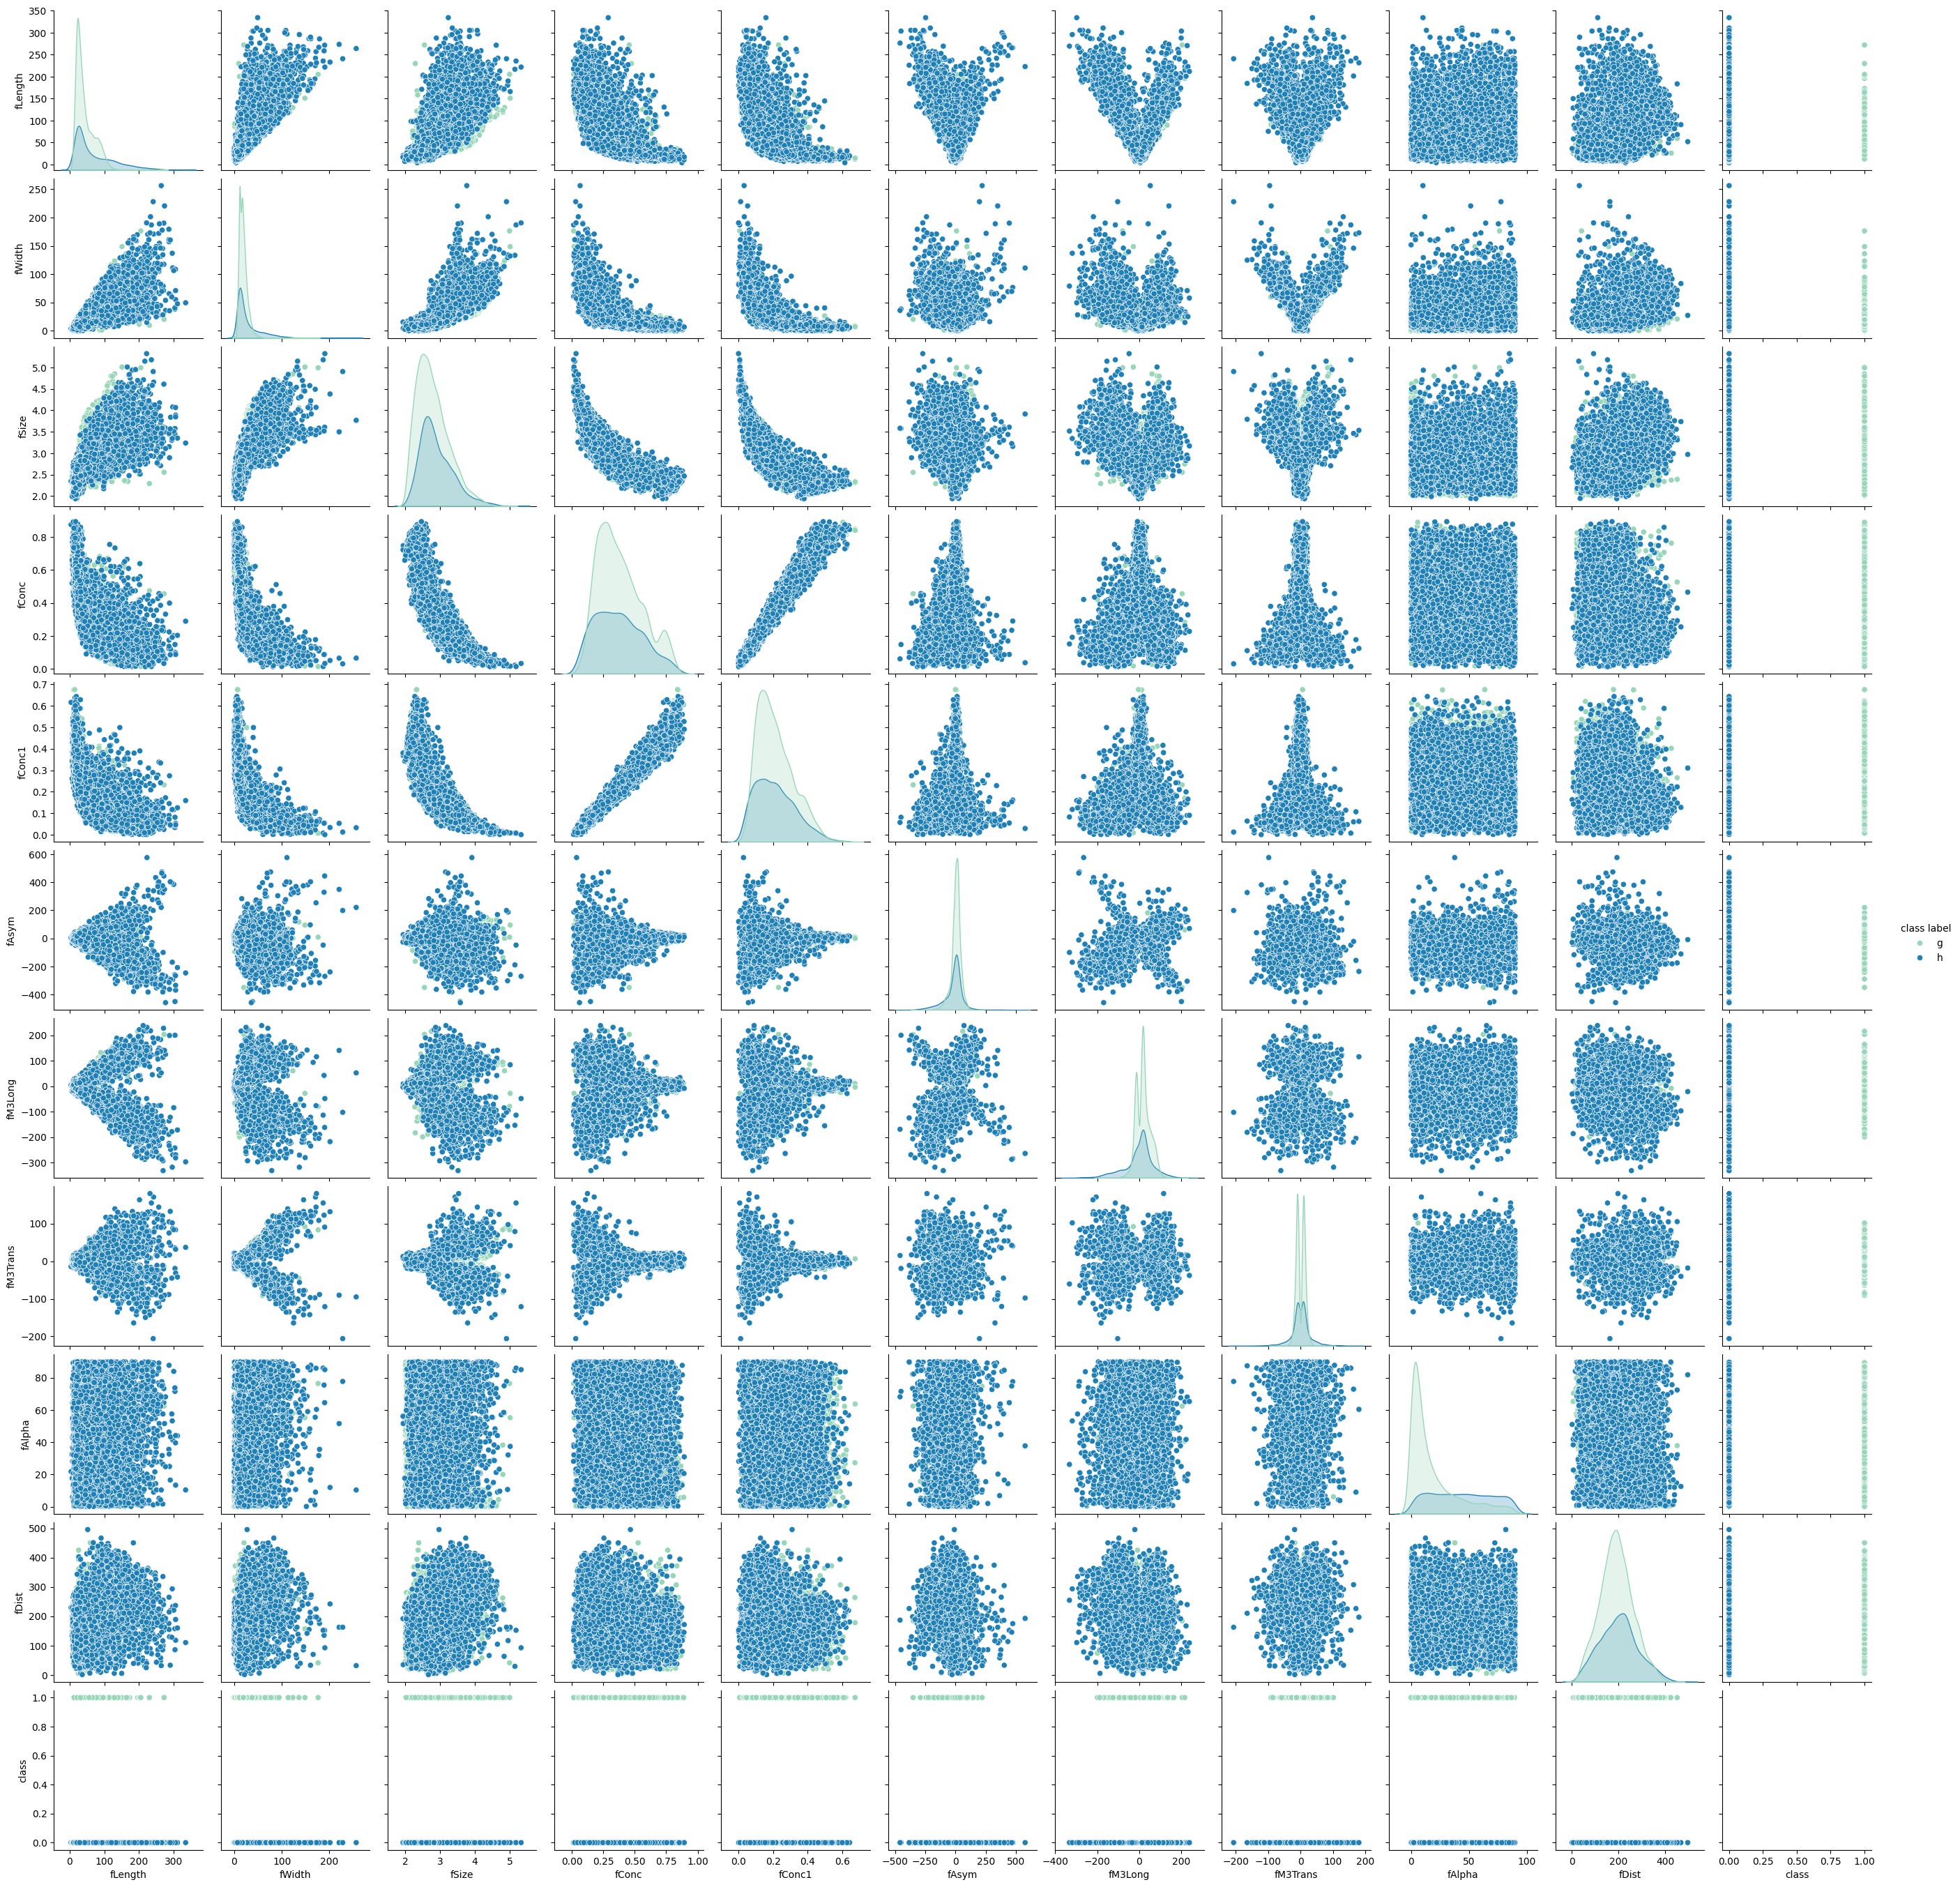

In [ ]:
sns.pairplot(data=data_plot, hue='class label', palette='YlGnBu')
plt.show()

**Correlation** **Map**

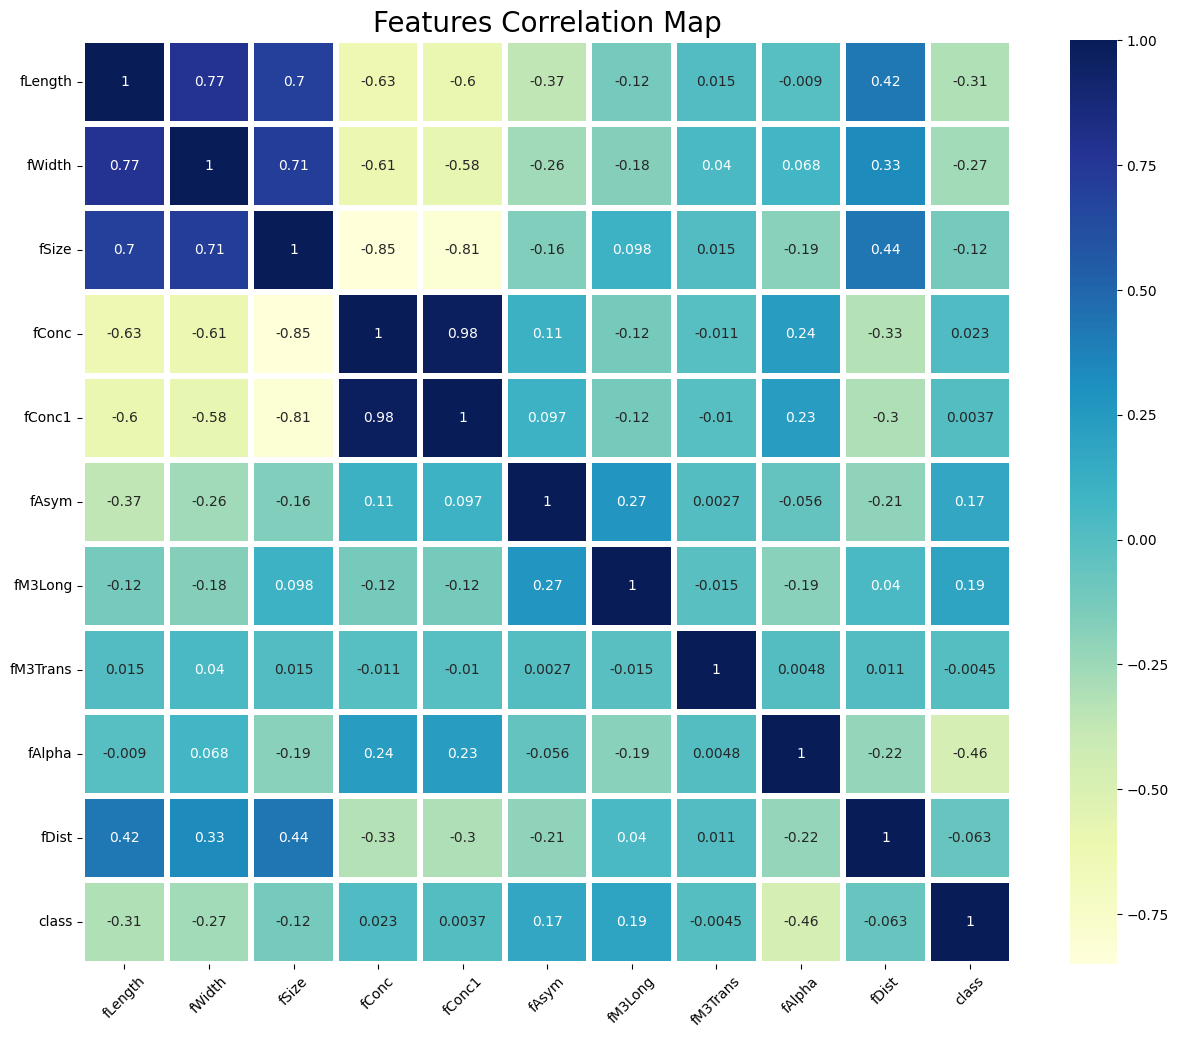

In [ ]:
corr = data_plot[['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist', 'class']].corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=True, linewidths=3, cmap='YlGnBu')
plt.title("Features Correlation Map", fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

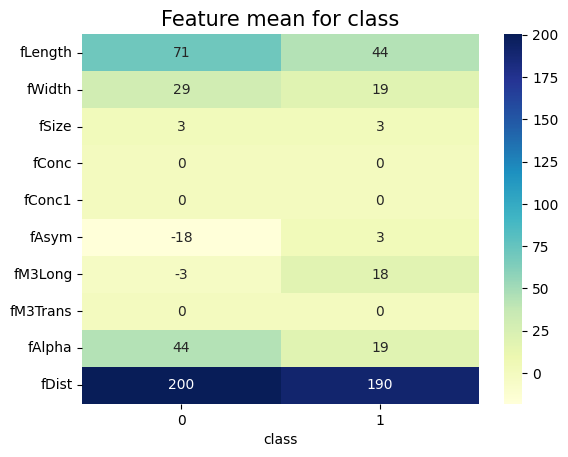

In [ ]:
# Mean values of features grouped by class
grouped = data_plot.groupby('class')[['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist']].mean()
sns.heatmap(grouped.T, annot=True, cmap='YlGnBu', fmt=".0f")
plt.title("Feature mean for class", fontsize=15)
plt.show()

## Features Engineering

In [ ]:
# Creation of new features that could be useful for classification

# Shape-related
data['Eccentricity'] = np.sqrt(1 - (data['fWidth'] / data['fLength'])**2)
data['Length_Width_Ratio'] = data['fLength'] / data['fWidth']

# Signal transformations
data['Rooted_Asym'] = np.sqrt(np.abs(data['fAsym']))
data['Conc_Ratio'] = data['fConc'] / data['fConc1']

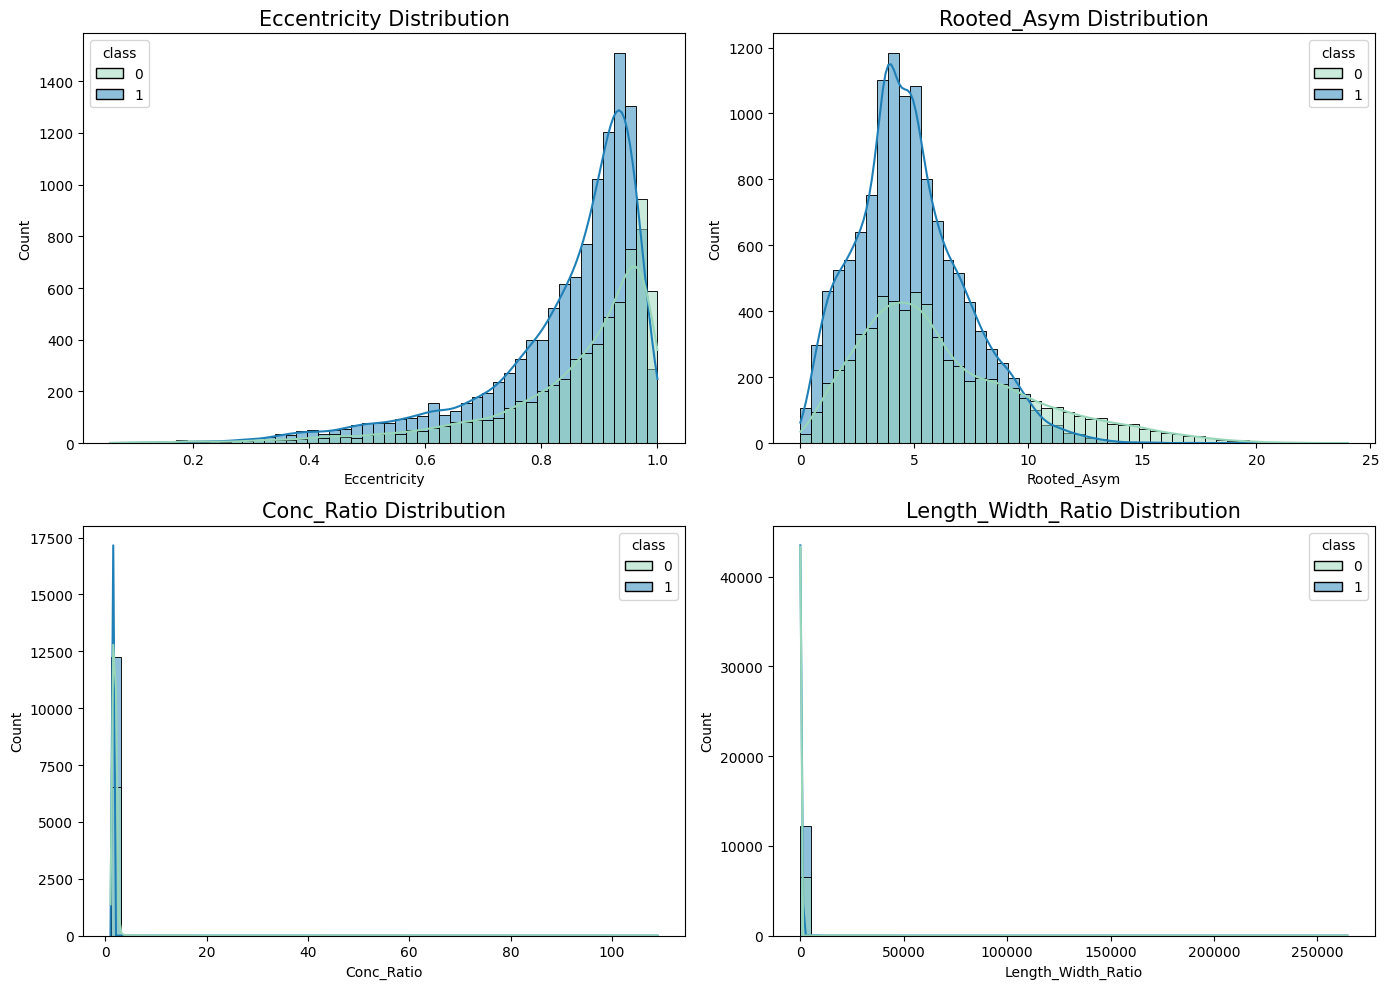

In [ ]:
# New features distribution plots
cols = ['Eccentricity', 'Rooted_Asym', 'Conc_Ratio', 'Length_Width_Ratio']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for ax, col in zip(axes.flatten(), cols):
    sns.histplot(data, x=col, hue='class', palette='YlGnBu', bins=50, kde=True, ax=ax)
    ax.set_title(f'{col} Distribution', fontsize=15)

plt.tight_layout()
plt.show()

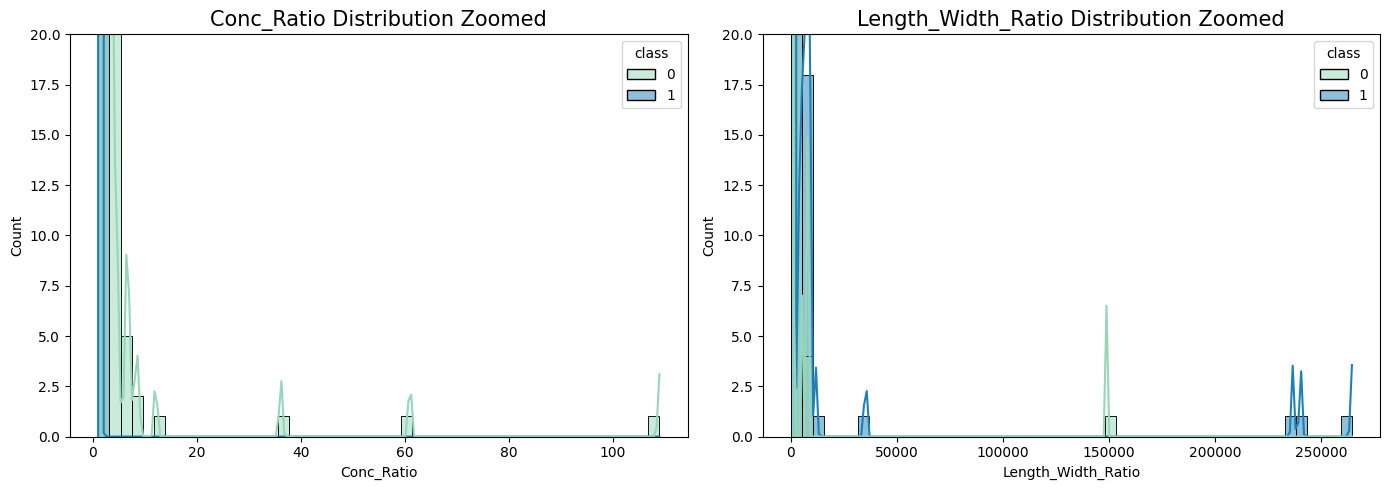

In [ ]:
# Zommed distribution of last two new features
cols = ['Conc_Ratio','Length_Width_Ratio']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for ax, col in zip(axes.flatten(), cols):
    sns.histplot(data, x=col, hue='class', palette='YlGnBu', bins=50, kde=True, ax=ax)
    ax.set_ylim(0, 20)
    ax.set_title(f'{col} Distribution Zoomed', fontsize=15)

plt.tight_layout()
plt.show()

In [ ]:
data.describe()

fLength        fWidth         fSize         fConc        fConc1  \
count  18807.000000  18807.000000  18807.000000  18807.000000  18807.000000   
mean      53.312913     22.261270      2.827959      0.378383      0.213505   
std       42.316925     18.278143      0.471279      0.181299      0.109613   
min        4.283500      0.000100      1.941300      0.013100      0.000300   
25%       24.437000     11.946800      2.480000      0.235100      0.128000   
50%       37.289500     17.213000      2.742700      0.352600      0.195600   
75%       70.199450     24.765550      3.104050      0.501050      0.283300   
max      334.177000    256.382000      5.323300      0.893000      0.675200   

              fAsym       fM3Long      fM3Trans        fAlpha         fDist  \
count  18807.000000  18807.000000  18807.000000  18807.000000  18807.000000   
mean      -4.217234     10.663454      0.264547     27.488807    193.880301   
std       59.151156     51.023341     20.821183     26.059142     74.742526   
min     -457.916100   -331.780000   -205.894700      0.000000      1.282600   
25%      -20.570900    -12.861400    -10.856200      5.491000    142.506500   
50%        4.132800     15.425300      1.284200     17.483000    192.034000   
75%       24.151750     36.054200     10.973100     45.554600    240.736550   
max      575.240700    238.321000    179.851000     90.000000    495.561000   

              class    Conc_Ratio  Eccentricity  Length_Width_Ratio  \
count  18807.000000  18807.000000  18807.000000        18807.000000   
mean       0.651566      1.821802      0.844464           63.619728   
std        0.476487      0.954546      0.143702         3331.676318   
min        0.000000      1.015081      0.058133            1.001694   
25%        0.000000      1.700168      0.794324            1.646106   
50%        1.000000      1.833333      0.893151            2.223425   
75%        1.000000      1.927862      0.943524            3.018386   
max        1.000000    109.000000      1.000000       264516.000000   

        Rooted_Asym  
count  18807.000000  
mean       5.318994  
std        3.040918  
min        0.000000  
25%        3.325365  
50%        4.793527  
75%        6.792849  
max       23.984176

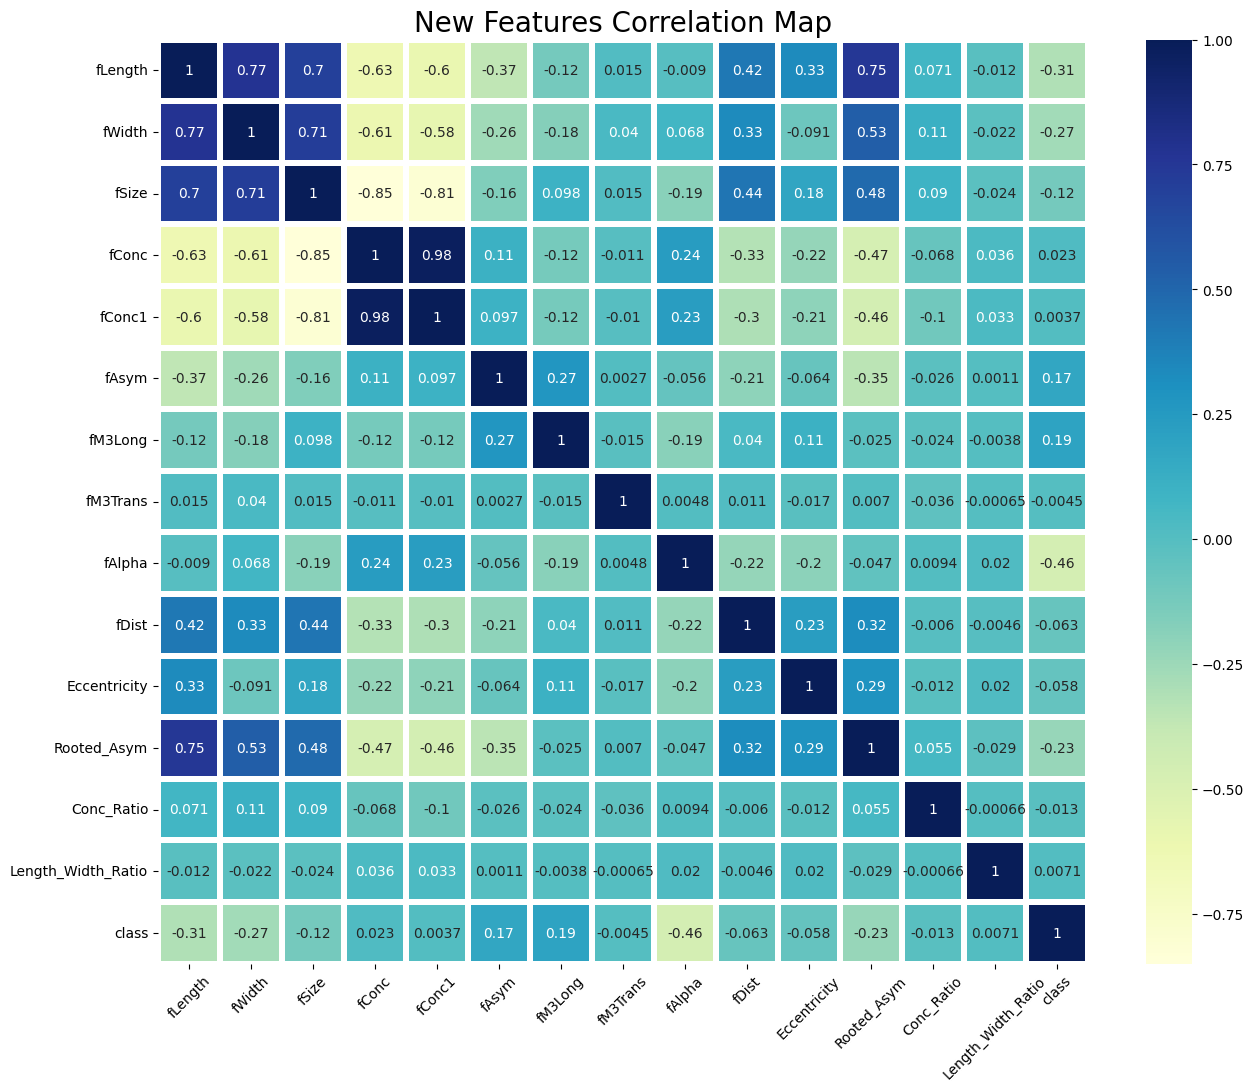

In [ ]:
# New correaltion map
corr = data[['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist', 'Eccentricity', 'Rooted_Asym', 'Conc_Ratio', 'Length_Width_Ratio', 'class']].corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=True, linewidths=3, cmap='YlGnBu')
plt.title("New Features Correlation Map", fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

## **Features Selection**

In [ ]:
#Taking into consideration the dataset features and the ones we added, we check the relevance of them in case it will be better to consider only some of them

#Import libraries needed for features selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score

In [ ]:
data

fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
18802   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
18803   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
18804   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
18805  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
18806  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist  class  Eccentricity  Rooted_Asym  \
0       -8.2027  40.0920   81.8828      1      0.831388     5.263117   
1       -9.9574   6.3609  205.2610      1      0.928651     5.125641   
2      -45.2160  76.9600  256.7880      1      0.543471    10.804675   
3       -7.1513  10.4490  116.7370      1      0.915671     5.216388   
4       21.8393   4.6480  356.4620      1      0.911398     2.351106   
...         ...      ...       ...    ...           ...          ...   
18802    2.8766   2.4229  106.8258      0      0.859873     3.906635   
18803   -2.9632  86.7975  247.4560      0      0.972825     6.089466   
18804   -9.4662  30.2987  256.5166      0      0.776597     3.058774   
18805  -63.8389  84.6874  408.3166      0      0.769939     2.409211   
18806   31.4755  52.7310  272.3174      0      0.959074    12.934933   

       Conc_Ratio  Length_Width_Ratio  
0        1.976791            1.799558  
1        1.405513            2.695748  
2        2.000000            1.191287  
3        1.567313            2.488008  
4        1.729258            2.429980  
...           ...                 ...  
18802    1.488815            1.958835  
18803    1.922055            4.318890  
18804    2.581056            1.587307  
18805    1.382138            1.567109  
18806    1.868746            3.531631  

[18807 rows x 15 columns]

In [ ]:
# Separation of features and target, and creation of train/test sets

X = data.drop(['class'], axis=1)
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, stratify=y, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(14105, 14)
(4702, 14)


In [ ]:
#Baseline model using all features
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

rf.fit(X_train, y_train)

probs = rf.predict_proba(X_test)[:, 1]

auc_all = round(roc_auc_score(y_test, probs), 4)
print(f"AUC: {auc_all}")

AUC: 0.9346


## Variance threshold

In [ ]:
# Creation of a copy of train and test set to use for variance threshold method
X_train_v1, X_test_v1, y_train_v1, y_test_v1 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [ ]:
# Check variance of each feature before applying threshold
X_train_v1.var(axis=0)

fLength               1.796197e+03
fWidth                3.343832e+02
fSize                 2.213150e-01
fConc                 3.283087e-02
fConc1                1.203023e-02
fAsym                 3.532079e+03
fM3Long               2.576107e+03
fM3Trans              4.334211e+02
fAlpha                6.754640e+02
fDist                 5.604739e+03
Eccentricity          2.078902e-02
Rooted_Asym           9.258271e+00
Conc_Ratio            1.198799e+00
Length_Width_Ratio    5.761669e+06
dtype: float64

In [ ]:
# Initialize MinMaxScaler for feature scaling in order to compare them
scaler = MinMaxScaler()
# Scale features to [0, 1] range
scaled_X_train_v1 = scaler.fit_transform(X_train_v1)

In [ ]:
# Check variance after scaling
scaled_X_train_v1.var(axis=0)

array([1.68000173e-02, 5.08673335e-03, 1.93478559e-02, 4.24018692e-02,
       2.64097413e-02, 3.30877474e-03, 7.92555146e-03, 2.91257483e-03,
       8.33847095e-02, 2.33446725e-02, 2.43808295e-02, 1.60934632e-02,
       1.02799090e-04, 9.97432378e-05])

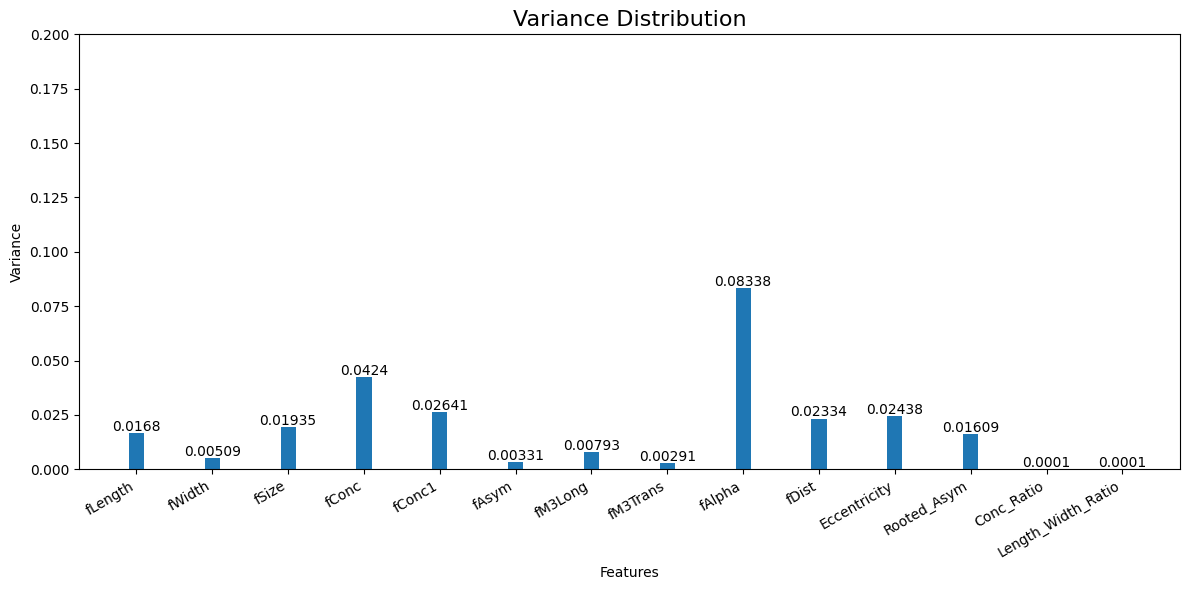

In [ ]:
# Plot variance of each feature

fig, ax = plt.subplots()
fig.set_size_inches(12, 6)

x = X.columns
y = scaled_X_train_v1.var(axis=0)

ax.bar(x, y, width=0.2)
ax.set_xlabel('Features')
ax.set_ylabel('Variance')
ax.set_ylim(0, 0.2)

for index, value in enumerate(y):
    plt.text(x=index, y=value+0.001, s=str(round(value, 5)), ha='center')

fig.autofmt_xdate()
plt.title('Variance Distribution', fontsize=16)
plt.tight_layout()

In [ ]:
# Drop low-variance features and evaluation of AUC
sel_X_train_v1 = X_train_v1.drop(['Conc_Ratio', 'Length_Width_Ratio','fAsym','fM3Trans'], axis=1)
sel_X_test_v1 = X_test_v1.drop(['Conc_Ratio', 'Length_Width_Ratio','fAsym','fM3Trans'], axis=1)

rf.fit(sel_X_train_v1, y_train_v1)

var_probs = rf.predict_proba(sel_X_test_v1)[:, 1]
auc_score_var = round(roc_auc_score(y_test_v1, var_probs), 4)

print(f"AUC Variance: {auc_score_var}")

AUC Variance: 0.932


## K-Best Features

In [ ]:
# Creation of a copy of train and test set to use for select kBest method
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [ ]:
auc_score_list = []

# Try different numbers of top features
for k in range(1, 15):
    # Select top-k features based on mutual information
    selector = SelectKBest(mutual_info_classif, k=k)
    selector.fit(X_train_v2, y_train_v2)

    # Transform train and test sets with selected features
    sel_X_train_v2 = selector.transform(X_train_v2)
    sel_X_test_v2 = selector.transform(X_test_v2)

    # Train Random Forest classifier on selected features and get predicted probabilities
    rf.fit(sel_X_train_v2, y_train_v2)
    kbest_probs = rf.predict_proba(sel_X_test_v2)[:, 1]

    # Compute and store AUC score
    auc_score = round(roc_auc_score(y_test_v2, kbest_probs), 4)
    auc_score_list.append(auc_score)

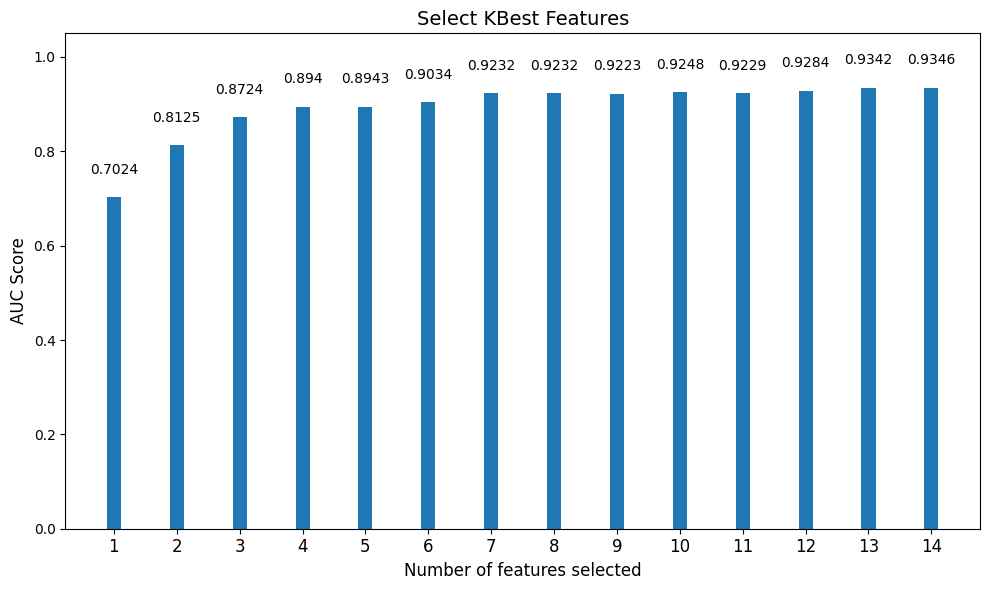

In [ ]:
# Plot AUC scores for different numbers of top features selected using SelectKBest
fig, ax = plt.subplots(figsize=(10, 6))

x = np.linspace(1, 30, 14)
y = auc_score_list

ax.bar(x, y, width=0.5)
ax.set_xlabel('Number of features selected', fontsize=12)
ax.set_ylabel('AUC Score', fontsize=12)
ax.set_ylim(0, 1.05)
ax.set_xticks(x)
ax.set_xticklabels(np.arange(1, 15), fontsize=12)

for i, v in enumerate(y):
    plt.text(x[i], v + 0.05, s=str(v), ha='center', fontsize=10)

plt.title('Select KBest Features', fontsize=14)
plt.tight_layout()
plt.show()

## Recursive feature elimination (RFE)

In [ ]:
# Creation of a copy of train and test set to use for select RFE method
X_train_v3, X_test_v3, y_train_v3, y_test_v3 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [ ]:
rfe_auc_score_list = []

# Try RFE with different numbers of top features
for k in range(1, 15):

    # Initialize RFE with the desired number of features
    RFE_selector = RFE(estimator=rf, n_features_to_select=k, step=1)
    RFE_selector.fit(X_train_v3, y_train_v3)

    # Transform train and test sets with selected features
    sel_X_train_v3 = RFE_selector.transform(X_train_v3)
    sel_X_test_v3 = RFE_selector.transform(X_test_v3)

    # Train Random Forest classifier on selected features and get predicted probabilities
    rf.fit(sel_X_train_v3, y_train_v3)
    RFE_probs = rf.predict_proba(sel_X_test_v3)[:, 1]

    # Compute and store AUC score
    auc_score_rfe = round(roc_auc_score(y_test_v3, RFE_probs), 4)
    rfe_auc_score_list.append(auc_score_rfe)

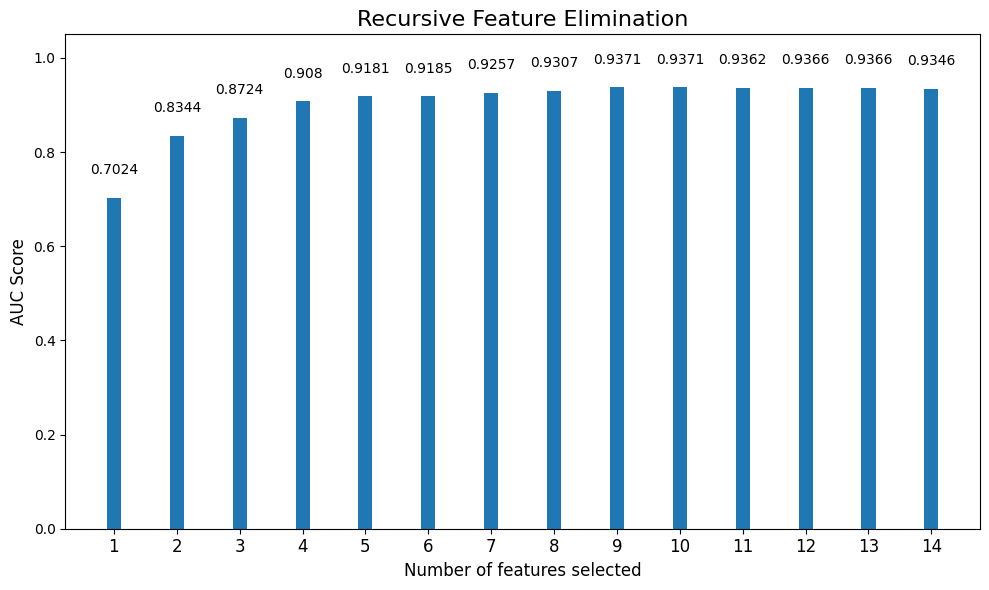

In [ ]:
# Plot AUC scores for different numbers of top features selected using RFE
fig, ax = plt.subplots(figsize=(10, 6))

x = np.linspace(1, 30, 14)
y = rfe_auc_score_list

ax.bar(x, y, width=0.5)
ax.set_xlabel('Number of features selected', fontsize=12)
ax.set_ylabel('AUC Score', fontsize=12)
ax.set_ylim(0, 1.05)
ax.set_xticks(x)
ax.set_xticklabels(np.arange(1, 15), fontsize=12)

for i, v in enumerate(y):
    plt.text(x[i], v + 0.05, s=str(v), ha='center', fontsize=10)

plt.title('Recursive Feature Elimination', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Final selected features with RFE by studing the plot

# Initialize RFE with 10 features to select
RFE_selector = RFE(estimator=rf, n_features_to_select=10, step=10)
RFE_selector.fit(X_train_v3, y_train_v3)

# Get mask of selected features
selected_features_mask = RFE_selector.get_support()

# Extract feature names from the mask
selected_features = X_train_v3.columns[selected_features_mask]
selected_features

Index(['fLength', 'fWidth', 'fSize', 'fM3Long', 'fAlpha', 'fDist',
       'Eccentricity', 'Rooted_Asym', 'Conc_Ratio', 'Length_Width_Ratio'],
      dtype='object')

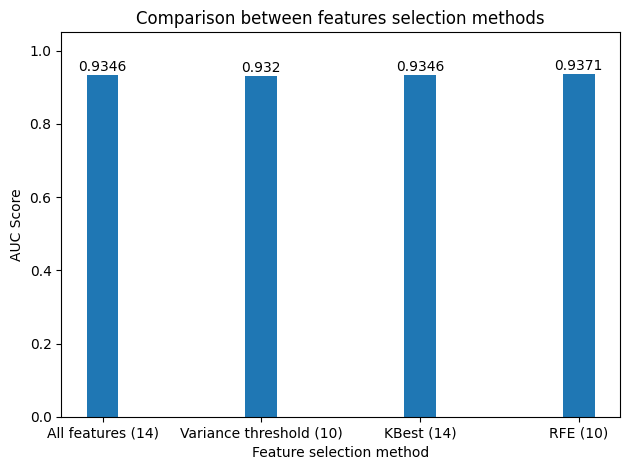

In [ ]:
# Summary plot of all selection methods comparing their AUCs
fig, ax = plt.subplots()

x = ['All features (14)', 'Variance threshold (10)', 'KBest (14)', 'RFE (10)']
y = [auc_all, auc_score_var, 0.9346, 0.9371]

ax.bar(x, y, width=0.2)
ax.set_xlabel('Feature selection method')
ax.set_ylabel('AUC Score')
ax.set_ylim(0, 1.05)

for i, v in enumerate(y):
    plt.text(x=i, y=v+0.01, s=str(v), ha='center')

plt.title('Comparison between features selection methods')
plt.tight_layout()